## Data Sourcing

In [68]:
from statsbombpy import sb
import pandas as pd
import numpy as np

# Load all competitions available from StatsBomb Open Data
competitions = sb.competitions()

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Show the competitions
competitions[['competition_name', 'season_name', 'competition_id', 'season_id']].head(3)

,competition_name,season_name,competition_id,season_id
0,1. Bundesliga,2023/2024,9,281
1,1. Bundesliga,2015/2016,9,27
2,African Cup of Nations,2023,1267,107


✅ FIFA World Cup 2018

- competition_id=43

- season_id=3

In [69]:
# Load all matches from FIFA World Cup 2018
matches_wc2018 = sb.matches(competition_id=43, season_id=3)

In [70]:
matches_wc2018.head(1)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,7585,2018-07-03,20:00:00.000,International - FIFA World Cup,2018,Colombia,England,1,1,available,scheduled,2023-07-24T13:06:27.791230,2021-06-13T16:17:31.694,4,Round of 16,Otkritie Bank Arena,Mark Geiger,José Néstor Pekerman,Gareth Southgate,1.0.2,None,None


In [71]:
# Preview the data
matches_wc2018[['match_id', 'home_team', 'away_team', 'match_date']].head()

,match_id,home_team,away_team,match_date
0,7585,Colombia,England,2018-07-03
1,7570,England,Belgium,2018-06-28
2,7586,Sweden,Switzerland,2018-07-03
3,7557,Iran,Portugal,2018-06-25
4,7542,Portugal,Morocco,2018-06-20


In [72]:
# Filter matches where Argentina or Portugal were involved
target_teams = ['Argentina', 'Portugal']

filtered_matches = matches_wc2018[
    matches_wc2018['home_team'].isin(target_teams) |
    matches_wc2018['away_team'].isin(target_teams)
]

# Preview the filtered matches
filtered_matches[['match_id', 'home_team', 'away_team', 'match_date']]


,match_id,home_team,away_team,match_date
3,7557,Iran,Portugal,2018-06-25
4,7542,Portugal,Morocco,2018-06-20
17,7576,Portugal,Spain,2018-06-15
21,7580,France,Argentina,2018-06-30
37,7545,Argentina,Croatia,2018-06-21
41,7531,Argentina,Iceland,2018-06-16
47,7564,Nigeria,Argentina,2018-06-26
48,7579,Uruguay,Portugal,2018-06-30


In [73]:
# Messi's match IDs
messi_matches = [7531, 7545, 7564, 7580]

# Messi's full name in StatsBomb
messi_name = "Lionel Andrés Messi Cuccittini"

# Create empty list to hold data
messi_events = []

for match_id in messi_matches:
    events = sb.events(match_id=match_id)
    messi_data = events[events['player'] == messi_name]
    messi_events.append(messi_data)

# Combine all into one DataFrame
messi_df = pd.concat(messi_events, ignore_index=True)


In [74]:
messi_df

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_backheel,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_height,pass_length,pass_outcome,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,bad_behaviour_card,ball_recovery_offensive,foul_committed_card,pass_goal_assist,pass_miscommunication,block_deflection,miscontrol_aerial_won,shot_redirect
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,523a5579-5ba8-47b2-9ce3-381bd5693c03,160,NaN,NaN,"[88.0, 8.0]",7531,3,NaN,0.989416,ea3d6191-da9c-42eb-bee3-84ca7a0d25d2,NaN,Left Foot,True,NaN,NaN,"[111.0, 43.0]",High Pass,41.880783,NaN,Nicolás Hernán Otamendi,3090.0,True,NaN,NaN,NaN,Free Kick,1,From Free Kick,Lionel Andrés Messi Cuccittini,5503.0,Center Attacking Midfield,5,Argentina,779,[7747675f-88ed-496b-9122-75f1e55ac265],58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:03:58.553,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20bdbdde-d40f-4241-ac2b-768b50bf3cef,213,NaN,NaN,"[60.0, 54.0]",7531,5,NaN,-1.518213,NaN,NaN,Left Foot,NaN,NaN,NaN,"[61.0, 35.0]",Ground Pass,19.026299,NaN,Lucas Rodrigo Biglia,5510.0,NaN,NaN,NaN,NaN,NaN,1,Regular Play,Lionel Andrés Messi Cuccittini,5503.0,Center Attacking Midfield,8,Argentina,779,[32cf0279-fff1-41ac-b155-63a42c90ca31],37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:05:37.793,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42d7dc43-a8f7-430a-a476-ed91d495b968,272,NaN,NaN,"[86.0, 62.0]",7531,6,NaN,-2.191046,NaN,NaN,Right Foot,NaN,NaN,NaN,"[81.0, 55.0]",Ground Pass,8.602325,NaN,Javier Alejandro Mascherano,5506.0,NaN,NaN,NaN,NaN,Free Kick,1,From Free Kick,Lionel Andrés Messi Cuccittini,5503.0,Center Attacking Midfield,12,Argentina,779,[f9a3c521-ea1d-4a16-9c9f-37fcf4be3b6c],56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:06:56.873,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28c0e2cc-aff7-476f-baeb-7b3fff6e1ae3,278,NaN,NaN,"[77.0, 49.0]",7531,7,NaN,-1.484058,NaN,NaN,Left Foot,NaN,NaN,NaN,"[79.0, 26.0]",Ground Pass,23.086792,NaN,Faustino Marcos Alberto Rojo,3602.0,NaN,NaN,NaN,NaN,NaN,1,From Free Kick,Lionel Andrés Messi Cuccittini,5503.0,Center Attacking Midfield,12,Argentina,779,[ee6b7a96-7646-43b6-bd7f-8ab4f8d022c0],3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:07:03.273,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499886b0-f13b-4af8-933e-8bef79f6c7ff,299,NaN,NaN,"[86.0, 65.0]",7531,7,NaN,

In [75]:
messi_df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_offensive', 'carry_end_location', 'clearance_aerial_won',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_offensive', 'foul_committed_penalty',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_cut_back',
       'pass_deflected', 'pass_end_location', 'pass_height', 'pass_length',
       'pass_outcome', 'pass_recipient', 'pass_recipient_id',


In [76]:
# Ronaldo's match IDs
ronaldo_matches = [7576, 7542, 7557, 7579]

# Ronaldo's full name in StatsBomb
ronaldo_name = "Cristiano Ronaldo dos Santos Aveiro"

# Create empty list to hold data
ronaldo_events = []

for match_id in ronaldo_matches:
    events = sb.events(match_id=match_id)
    ronaldo_data = events[events['player'] == ronaldo_name]
    ronaldo_events.append(ronaldo_data)

# Combine all into one DataFrame
ronaldo_df = pd.concat(ronaldo_events, ignore_index=True)


In [77]:
ronaldo_df

,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_backheel,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_length,pass_miscommunication,pass_outcome,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_open_goal,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,50_50,ball_recovery_offensive,block_deflection,block_offensive,dribble_nutmeg,bad_behaviour_card,shot_one_on_one
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3a5f202f-fc81-4b3e-b3f1-921eb0580fac,321,NaN,NaN,"[63.0, 36.0]",7576,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,Cristiano Ronaldo dos Santos Aveiro,5207.0,Left Center Forward,12,Spain,772,"[5d5a72b4-492d-4ea3-a30f-e649197be38e, 6b031f9...",14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal,780,00:08:14.480,Pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b9a86a6a-6548-4ef1-97e3-f258f4dc9e95,1019,NaN,NaN,"[39.0, 63.0]",7576,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Throw In,Cristiano Ronaldo dos Santos Aveiro,5207.0,Left Center Forward,32,Spain,772,"[210fd9e2-1c01-47bb-a3b2-d17488bb5106, 4d711aa...",33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal,780,00:20:33.200,Pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96c697c6-9ff4-4898-82e4-b11f5e0e7fd5,1428,NaN,NaN,"[68.0, 31.0]",7576,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Throw In,Cristiano Ronaldo dos Santos Aveiro,5207.0,Left Center Forward,48,Spain,772,"[22b1bdca-d474-49a2-942b-c22dbf2588a9, 56cb99d...",14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal,780,00:31:14.440,Pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c3cd068a-e8e4-479d-84ec-cee95ecdf76b,1579,NaN,NaN,"[24.0, 6.0]",7576,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,Cristiano Ronaldo dos Santos Aveiro,5207.0,Left Center Forward,51,Spain,772,"[75637fb4-f355-4a2f-a2e7-c8840dc75aff, 96c75a8...",31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal,780,00:33:31.440,Pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a6159c41-e91e-4534-8cc3-15ff2ac60262,1911,NaN,NaN,"[61.0, 34.0]",7576,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Throw In,Cristiano Ronaldo dos Santos Aveiro,5207.0,Left Center Forward,60,Spain,772,"[220c2059-16e3-4be6-804a-8480ec7ce252, 96f60a4...",34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Why Messi 971 entries whilst Ronaldo has 573 within 4 games each?

- Messi drops deep, carries the ball, passes a lot, and builds play. Messi naturally touches the ball more, which creates more recorded events

- Ronaldo stays higher up the pitch, more focused on finishing and positioning.

In [78]:
messi_df['type'].value_counts()

type
Ball Receipt*     280
Carry             251
Pass              202
Pressure           66
Dribble            28
Ball Recovery      22
Shot               18
Foul Won           18
Dispossessed       16
Duel                8
Block               7
Miscontrol          7
Foul Committed      5
Dribbled Past       1
Bad Behaviour       1
50/50               1
Name: count, dtype: int64

In [79]:
ronaldo_df['type'].value_counts()

type
Ball Receipt*     212
Carry             127
Pass              113
Pressure           31
Shot               22
Dribble            14
Foul Won           14
Miscontrol         10
Ball Recovery       9
Dispossessed        8
Clearance           4
Duel                3
Block               3
Dribbled Past       1
Foul Committed      1
Bad Behaviour       1
Name: count, dtype: int64

### Who had more impact on creating scoring chances?
#### Metric: Key passes, assists, xG assisted (if available), shot-creating actions
##### 🧪 Hypothesis: Messi created more chances than Ronaldo.

### Step 1: Count Assists, Key Passes, Total Passes, and Shots (Feature selection)

In [80]:
def get_player_summary(player_df):
    import numpy as np

    # Basic types
    passes = player_df[player_df['type'] == 'Pass']
    shots = player_df[player_df['type'] == 'Shot']
    carries = player_df[player_df['type'] == 'Carry']
    dribbles = player_df[player_df['type'] == 'Dribble']
    pressures = player_df[player_df['type'] == 'Pressure']
    duels = player_df[player_df['type'] == 'Duel']
    ball_receipts = player_df[player_df['type'] == 'Ball Receipt*']
    recoveries = player_df[player_df['type'] == 'Ball Recovery']
    miscontrols = player_df[player_df['type'] == 'Miscontrol']
    dispossessed = player_df[player_df['type'] == 'Dispossessed']

    # Pass-based filters
    key_passes = passes[passes['pass_shot_assist'] == True]
    assists = passes[passes['pass_goal_assist'] == True]
    forward_passes = passes[
        passes.apply(lambda row: row.get('pass_end_location', [0])[0] > row.get('location', [0])[0], axis=1)
    ]
    pass_outcomes = passes['pass_outcome']
    successful_passes = pass_outcomes.isna()  # Successful passes have NaN outcome

    # Shots
    goals = shots[shots['shot_outcome'] == 'Goal']
    shots_on_target = shots[shots['shot_outcome'].isin(['Goal', 'Saved'])]

    # xG
    xg_values = shots['shot_statsbomb_xg'].dropna()
    total_xg = xg_values.sum()
    avg_xg = xg_values.mean() if not xg_values.empty else np.nan

    # Extra features
    duel_success = duels['duel_outcome'].value_counts().get('Won', 0)
    foul_adv = player_df['foul_won_advantage'].sum(skipna=True)
    foul_def = player_df['foul_won_defensive'].sum(skipna=True)
    foul_pen = player_df['foul_won_penalty'].sum(skipna=True)
    aerial_wins = passes['pass_aerial_won'].sum(skipna=True)
    miscommunication = passes['pass_miscommunication'].sum(skipna=True)
    bad_cards = player_df['bad_behaviour_card'].notna().sum()

    return {
        "Total Passes": len(passes),
        "Pass Accuracy (%)": round(successful_passes.sum() / len(passes) * 100, 1) if len(passes) > 0 else np.nan,
        "Forward Passes": len(forward_passes),
        "Key Passes": len(key_passes),
        "Assists": len(assists),

        "Total Shots": len(shots),
        "Goals": len(goals),
        "Shots on Target": len(shots_on_target),
        "Total xG": round(total_xg, 3),
        "Avg xG per Shot": round(avg_xg, 3) if not np.isnan(avg_xg) else "N/A",

        "Carries": len(carries),
        "Dribbles Attempted": len(dribbles),
        "Pressures": len(pressures),
        "Duels Attempted": len(duels),
        "Duels Won": duel_success,
        "Ball Recoveries": len(recoveries),
        "Dispossessed": len(dispossessed),
        "Miscontrols": len(miscontrols),
        "Ball Receipts": len(ball_receipts),

        "Fouls Won (Advantage)": int(foul_adv),
        "Fouls Won (Defensive)": int(foul_def),
        "Fouls Won (Penalty)": int(foul_pen),
        "Aerial Passes Won": int(aerial_wins),
        "Pass Miscommunications": int(miscommunication),
        "Bad Behaviour Cards": bad_cards
    }


In [81]:
messi_summary = get_player_summary(messi_df)
ronaldo_summary = get_player_summary(ronaldo_df)

summary_df = pd.DataFrame([messi_summary, ronaldo_summary], index=["Messi", "Ronaldo"])
summary_df.T  # Transpose for better view


,Messi,Ronaldo
Total Passes,202.000,113.000
Pass Accuracy (%),80.700,80.500
Forward Passes,133.000,54.000
Key Passes,8.000,4.000
Assists,1.000,0.000
Total Shots,18.000,22.000
Goals,1.000,4.000
Shots on Target,5.000,8.000
Total xG,1.877,2.705
Avg xG per Shot,0.104,0.123


### Heatmap of Ball Touches (Ball Receipts)

Question it answers:
- Where on the pitch did each player receive the ball? Were they involved in deeper areas or only up front?

In [82]:
#### Extract Ball Receipt Locations
import numpy as np

# Messi ball receipts
messi_receipts = messi_df[messi_df['type'] == 'Ball Receipt*']
messi_locations = np.array(messi_receipts['location'].dropna().tolist())

# Ronaldo ball receipts
ronaldo_receipts = ronaldo_df[ronaldo_df['type'] == 'Ball Receipt*']
ronaldo_locations = np.array(ronaldo_receipts['location'].dropna().tolist())

/Users/riadanas/Desktop/Youtube tutorials/Football world cup 2018 Messi vs Ronaldo/.venv/lib/python3.10/site-packages/mplsoccer/_pitch_plot.py:167: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/Users/riadanas/Desktop/Youtube tutorials/Football world cup 2018 Messi vs Ronaldo/.venv/lib/python3.10/site-packages/mplsoccer/_pitch_plot.py:167: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




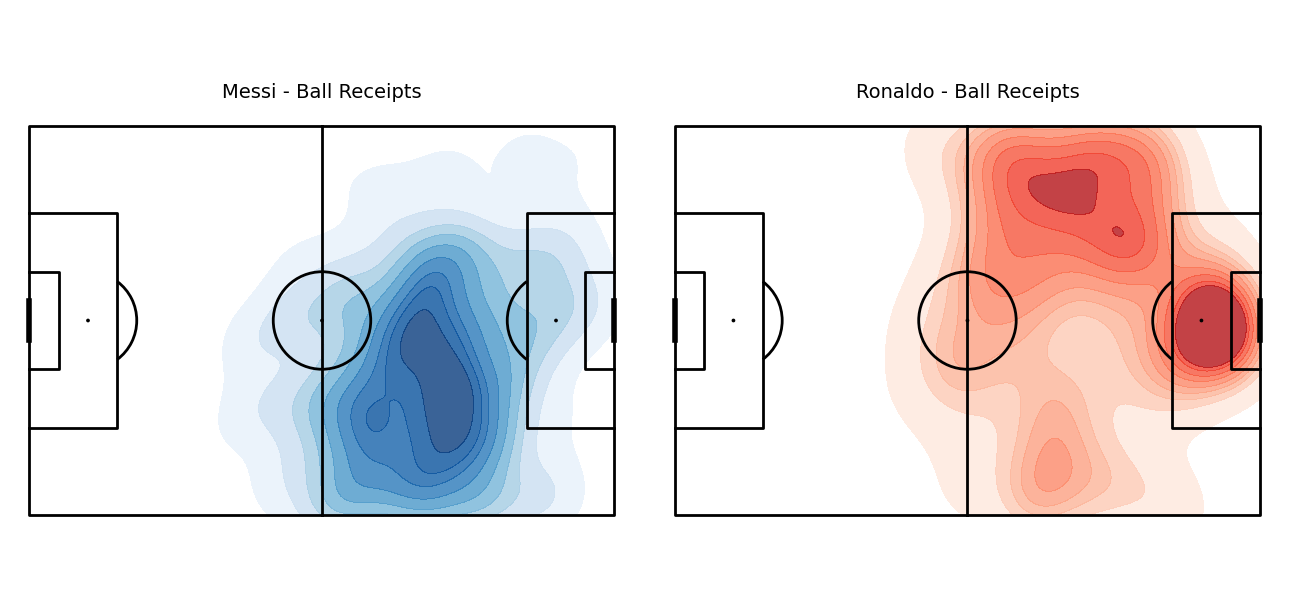

In [83]:
#### Plot Side-by-Side Heatmaps with mplsoccer
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import numpy as np

# Create full pitch layout (side-by-side)
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, line_color='black')
fig, axs = pitch.grid(ncols=2, nrows=1, figheight=6, axis=False)

# Plot Messi
axs['pitch'][0].set_title("Messi - Ball Receipts", fontsize=14)
pitch.kdeplot(
    x=messi_locations[:, 0],
    y=messi_locations[:, 1],
    ax=axs['pitch'][0],
    cmap='Blues',
    fill=True,
    shade=True,
    bw_adjust=0.8,
    alpha=0.8
)

# Plot Ronaldo
axs['pitch'][1].set_title("Ronaldo - Ball Receipts", fontsize=14)
pitch.kdeplot(
    x=ronaldo_locations[:, 0],
    y=ronaldo_locations[:, 1],
    ax=axs['pitch'][1],
    cmap='Reds',
    fill=True,
    shade=True,
    bw_adjust=0.8,
    alpha=0.8
)

plt.tight_layout()
plt.show()



- We can validate the hypothesis that Messi drops back more than Ronaldo
- Messi more the role of a number 10 than a striker
- Ronaldo plays more as a number 9 and 7 than a playmaker

### Shot maps
- Where did Messi and Ronaldo shoot from, and how dangerous were those shots (xG)?

In [84]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Filter shots
messi_shots = messi_df[messi_df['type'] == 'Shot']
ronaldo_shots = ronaldo_df[ronaldo_df['type'] == 'Shot']

# Get coordinates
messi_x = messi_shots['location'].apply(lambda x: x[0] if isinstance(x, list) else None)
messi_y = messi_shots['location'].apply(lambda x: x[1] if isinstance(x, list) else None)

ronaldo_x = ronaldo_shots['location'].apply(lambda x: x[0] if isinstance(x, list) else None)
ronaldo_y = ronaldo_shots['location'].apply(lambda x: x[1] if isinstance(x, list) else None)

# Get xG and outcome
messi_xg = messi_shots['shot_statsbomb_xg']
ronaldo_xg = ronaldo_shots['shot_statsbomb_xg']

messi_goal = messi_shots['shot_outcome'] == 'Goal'
ronaldo_goal = ronaldo_shots['shot_outcome'] == 'Goal'

In [85]:
messi_goal.value_counts()

shot_outcome
False    17
True      1
Name: count, dtype: int64

In [86]:
ronaldo_goal.value_counts()

shot_outcome
False    18
True      4
Name: count, dtype: int64

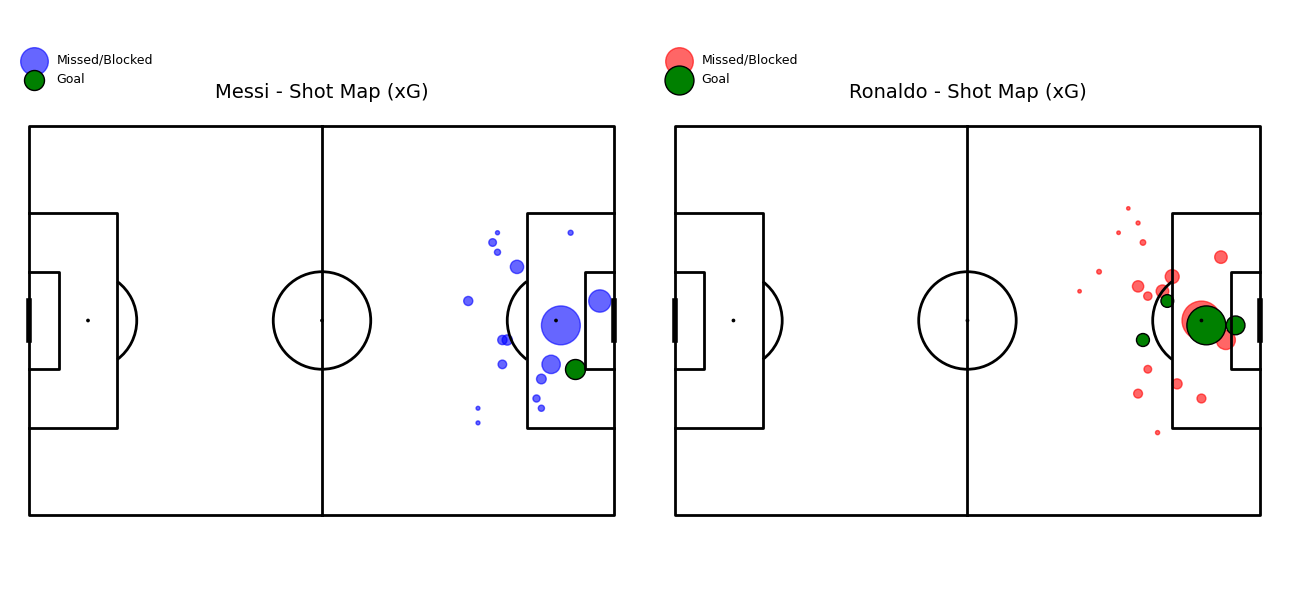

In [87]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Setup the pitch (StatsBomb layout, black lines)
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, line_color='black')

# Create 2 side-by-side pitches
fig, axs = pitch.grid(ncols=2, nrows=1, figheight=6, axis=False)

# MESSI SHOTS
axs['pitch'][0].set_title("Messi - Shot Map (xG)", fontsize=14)

# Missed/Blocked shots - blue dots sized by xG
scatter1 = pitch.scatter(
    x=messi_x[~messi_goal], y=messi_y[~messi_goal],
    s=messi_xg[~messi_goal]*1000, ax=axs['pitch'][0],
    color='blue', alpha=0.6, label='Missed/Blocked'
)

# Goals - green dots with black edge
scatter2 = pitch.scatter(
    x=messi_x[messi_goal], y=messi_y[messi_goal],
    s=messi_xg[messi_goal]*1000, ax=axs['pitch'][0],
    color='green', edgecolors='black', label='Goal'
)

# Legend ABOVE the pitch (bbox_to_anchor sets position)
axs['pitch'][0].legend(
    handles=[scatter1, scatter2],
    labels=['Missed/Blocked', 'Goal'],
    loc='lower left',
    bbox_to_anchor=(0, 1.02),
    fontsize=9,
    frameon=False
)

# RONALDO SHOTS
axs['pitch'][1].set_title("Ronaldo - Shot Map (xG)", fontsize=14)

scatter3 = pitch.scatter(
    x=ronaldo_x[~ronaldo_goal], y=ronaldo_y[~ronaldo_goal],
    s=ronaldo_xg[~ronaldo_goal]*1000, ax=axs['pitch'][1],
    color='red', alpha=0.6, label='Missed/Blocked'
)

scatter4 = pitch.scatter(
    x=ronaldo_x[ronaldo_goal], y=ronaldo_y[ronaldo_goal],
    s=ronaldo_xg[ronaldo_goal]*1000, ax=axs['pitch'][1],
    color='green', edgecolors='black', label='Goal'
)

# Legend ABOVE Ronaldo's pitch
axs['pitch'][1].legend(
    handles=[scatter3, scatter4],
    labels=['Missed/Blocked', 'Goal'],
    loc='lower left',
    bbox_to_anchor=(0, 1.02),
    fontsize=9,
    frameon=False
)

# Final layout
plt.tight_layout()
plt.show()


- Out of 18 shots Messi score 1
- Out of 22 shots Ronaldo score 4 (2 outside the box)

### Key Passes (Creativity and attacking intent)

- 🎯 Goal: Show where key passes started and ended, with arrows on the pitch
- ✅ Covers: passes with pass_shot_assist == True
- (i.e. they led to a shot)

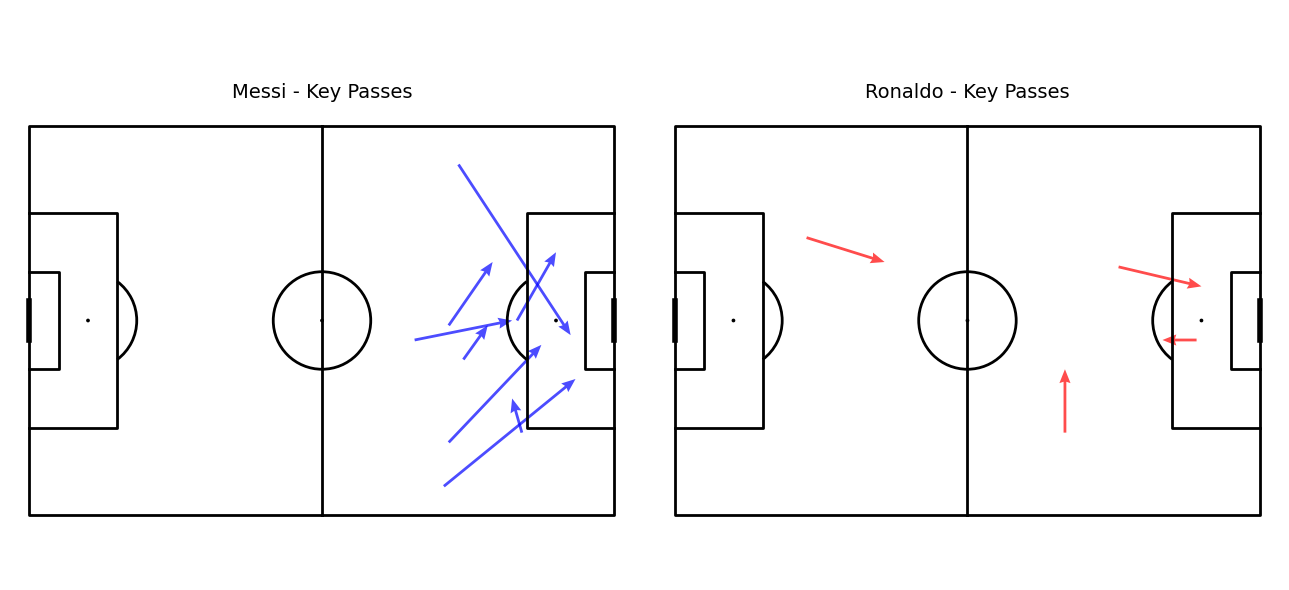

In [88]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Filter key passes only (passes that led to shots)
messi_key_passes = messi_df[
    (messi_df['type'] == 'Pass') & (messi_df['pass_shot_assist'] == True)
]
ronaldo_key_passes = ronaldo_df[
    (ronaldo_df['type'] == 'Pass') & (ronaldo_df['pass_shot_assist'] == True)
]

# Extract start and end locations for arrows
def get_pass_coordinates(df):
    start_x = df['location'].apply(lambda x: x[0] if isinstance(x, list) else None)
    start_y = df['location'].apply(lambda x: x[1] if isinstance(x, list) else None)
    end_x = df['pass_end_location'].apply(lambda x: x[0] if isinstance(x, list) else None)
    end_y = df['pass_end_location'].apply(lambda x: x[1] if isinstance(x, list) else None)
    return start_x, start_y, end_x, end_y

# Messi
messi_start_x, messi_start_y, messi_end_x, messi_end_y = get_pass_coordinates(messi_key_passes)

# Ronaldo
ronaldo_start_x, ronaldo_start_y, ronaldo_end_x, ronaldo_end_y = get_pass_coordinates(ronaldo_key_passes)

# Set up pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, line_color='black')
fig, axs = pitch.grid(ncols=2, nrows=1, figheight=6, axis=False)

# --- Messi Pass Arrows ---
axs['pitch'][0].set_title("Messi - Key Passes", fontsize=14)
pitch.arrows(
    messi_start_x, messi_start_y,
    messi_end_x, messi_end_y,
    ax=axs['pitch'][0],
    color='blue', width=2, headwidth=4, alpha=0.7
)

# --- Ronaldo Pass Arrows ---
axs['pitch'][1].set_title("Ronaldo - Key Passes", fontsize=14)
pitch.arrows(
    ronaldo_start_x, ronaldo_start_y,
    ronaldo_end_x, ronaldo_end_y,
    ax=axs['pitch'][1],
    color='red', width=2, headwidth=4, alpha=0.7
)

plt.tight_layout()
plt.show()

- Messi clearly more key passes than Ronaldo

## Radar chart to compare Messi Vs Ronaldo

In [89]:
# Minutes played
minutes = 360

# Updated Messi stats
messi_values = {
    'Pass Accuracy (%)': messi_summary['Pass Accuracy (%)'],
    'Key Passes per 90': messi_summary['Key Passes'] / minutes * 90,
    'xG per Shot': messi_summary['Avg xG per Shot'],
    'Shots on Target %': messi_summary['Shots on Target'] / messi_summary['Total Shots'] * 100,
    'Carries per 90': messi_summary['Carries'] / minutes * 90,
    'Pressures per 90': messi_summary['Pressures'] / minutes * 90,
    'Goals per 90': messi_summary['Goals'] / minutes * 90,
    'Assists per 90': messi_summary['Assists'] / minutes * 90
}

# Updated Ronaldo stats
ronaldo_values = {
    'Pass Accuracy (%)': ronaldo_summary['Pass Accuracy (%)'],
    'Key Passes per 90': ronaldo_summary['Key Passes'] / minutes * 90,
    'xG per Shot': ronaldo_summary['Avg xG per Shot'],
    'Shots on Target %': ronaldo_summary['Shots on Target'] / ronaldo_summary['Total Shots'] * 100,
    'Carries per 90': ronaldo_summary['Carries'] / minutes * 90,
    'Pressures per 90': ronaldo_summary['Pressures'] / minutes * 90,
    'Goals per 90': ronaldo_summary['Goals'] / minutes * 90,
    'Assists per 90': ronaldo_summary['Assists'] / minutes * 90
}

In [90]:
messi_values

{'Pass Accuracy (%)': np.float64(80.7),
 'Key Passes per 90': 2.0,
 'xG per Shot': np.float64(0.104),
 'Shots on Target %': 27.77777777777778,
 'Carries per 90': 62.75,
 'Pressures per 90': 16.5,
 'Goals per 90': 0.25,
 'Assists per 90': 0.25}

In [91]:
ronaldo_values

{'Pass Accuracy (%)': np.float64(80.5),
 'Key Passes per 90': 1.0,
 'xG per Shot': np.float64(0.123),
 'Shots on Target %': 36.36363636363637,
 'Carries per 90': 31.750000000000004,
 'Pressures per 90': 7.75,
 'Goals per 90': 1.0,
 'Assists per 90': 0.0}

In [92]:
import plotly.graph_objects as go

# List of parameters
parameters = list(messi_values.keys())

# Fixed min and max ranges for each metric (set based on your domain knowledge)
ranges = [
    (70, 100),     # Pass Accuracy (%)
    (0, 3),        # Key Passes per 90
    (0, 0.2),      # xG per Shot
    (0, 50),      # Shots on Target (%)
    (0, 70),       # Carries per 90
    (0, 20),       # Pressures per 90
    (0, 1),      # Goals per 90
    (0, 1),      # Assists per 90
]

# Normalize the metrics to a 0-1 scale
def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

messi_normalized = []
ronaldo_normalized = []
for i, param in enumerate(parameters):
    min_val, max_val = ranges[i]
    messi_normalized.append(normalize(messi_values[param], min_val, max_val))
    ronaldo_normalized.append(normalize(ronaldo_values[param], min_val, max_val))

# Close the loop for the radar chart by repeating the first element at the end
parameters_loop = parameters + [parameters[0]]
messi_norm_loop = messi_normalized + [messi_normalized[0]]
ronaldo_norm_loop = ronaldo_normalized + [ronaldo_normalized[0]]

# Create the radar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=messi_norm_loop,
    theta=parameters_loop,
    fill='toself',
    name='Messi',
    marker=dict(color='blue')
))

fig.add_trace(go.Scatterpolar(
    r=ronaldo_norm_loop,
    theta=parameters_loop,
    fill='toself',
    name='Ronaldo',
    marker=dict(color='red')
))

# Update layout for a clean look
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True,
    title="Normalized Radar Chart: Messi vs Ronaldo"
)

fig.show()


#### Summary & Conclusion:
- Both players have played 4 full games, so none of them took their team closer to the title than the other.
- However, Ronaldo has scored 4 goals compared to 1 by Messi (who has 1 assist as well)
- So in terms of G/A Ronaldo is at 1 per game and messi 0.5
- In terms of shots on target and xG per shot ronaldo leads
- In terms of key passes, pressure, carrying the ball Messi has a big advantage

In total both player were impact:
- Messi as a playmaker
- Ronaldo as a goalscorer

In summary:
- Messi: More involved in passing, ball carrying, and playmaking.
- Ronaldo: More direct in front of goal, shooting often and scoring more.